This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
%%time
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step
CPU times: user 6.77 s, sys: 2.34 s, total: 9.11 s
Wall time: 18.8 s


In [3]:
train_images.shape

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.01283554, 0.22648775,
       0.81939901])

In [6]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [7]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [9]:
%%time
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2966 - accuracy: 0.9154 - val_loss: 0.1495 - val_accuracy: 0.9567
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1219 - accuracy: 0.9639 - val_loss: 0.1095 - val_accuracy: 0.9666
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0804 - accuracy: 0.9761 - val_loss: 0.0899 - val_accuracy: 0.9733
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.0885 - val_accuracy: 0.9740
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0802 - val_accuracy: 0.9771
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0789 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.0800 - val_accuracy: 0.9762

**Plotting a validation accuracy comparison**

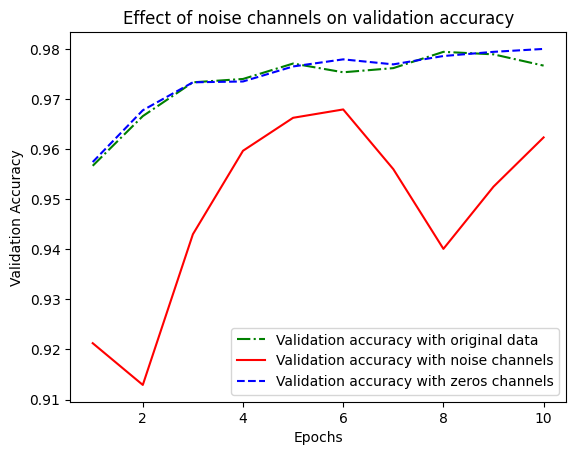

In [12]:
import matplotlib.pyplot as plt
val_acc_orig = history.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_orig, "g-.",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_noise, "r-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 10ms/step - loss: 2.3158 - accuracy: 0.1041 - val_loss: 2.3061 - val_accuracy: 0.1073
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2989 - accuracy: 0.1182 - val_loss: 2.3155 - val_accuracy: 0.1018
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2916 - accuracy: 0.1265 - val_loss: 2.3198 - val_accuracy: 0.1024
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2799 - accuracy: 0.1371 - val_loss: 2.3220 - val_accuracy: 0.1066
Epoch 5/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2643 - accuracy: 0.1523 - val_loss: 2.3327 - val_accuracy: 0.1002
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2449 - accuracy: 0.1644 - val_loss: 2.3507 - val_accuracy: 0.0976
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2220 - accuracy: 0.1777 - val_loss: 2.3656 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 835.9810 - accuracy: 0.3475 - val_loss: 2.2945 - val_accuracy: 0.2079
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 3.0459 - accuracy: 0.2556 - val_loss: 2.2320 - val_accuracy: 0.2328
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5273 - accuracy: 0.2121 - val_loss: 2.0460 - val_accuracy: 0.2364
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.5239 - accuracy: 0.2221 - val_loss: 2.1914 - val_accuracy: 0.2223
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4665 - accuracy: 0.2391 - val_loss: 2.1617 - val_accuracy: 0.2418
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 2.4545 - accuracy: 0.2139 - val_loss: 2.1467 - val_accuracy: 0.2110
Epoch 7/10
114/375 [========>.....................] - ETA: 4s - loss: 2.3286 - accuracy: 0.2034

KeyboardInterrupt: ignored

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary